In [9]:
import pandas as pd
import json

In [10]:
df = pd.read_csv('razmetka_komentov.csv.csv')

columns_to_drop = ['lead_time', 'updated_at', 'created_at', "annotator"]
df = df.drop(columns=columns_to_drop, errors='ignore')

display(df.head())

,annotation_id,comment,id,rating,taxonomy,Вопрос решен,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки
0,101,спасибо,2945792,5,"[{""taxonomy"":[[""Вопрос решен""]]}]",NaN,NaN,NaN,NaN,NaN
1,102,спасибо!,3234340,5,"[{""taxonomy"":[[""Вопрос решен""]]}]",NaN,NaN,NaN,NaN,NaN
2,103,Отлично,3380332,5,"[{""taxonomy"":[[""Вопрос решен""]]}]",NaN,NaN,NaN,NaN,NaN
3,104,Благодарю за оперативное решение проблемы !,3381812,5,"[{""taxonomy"":[[""Нравится скорость отработки за...",NaN,NaN,NaN,NaN,NaN
4,105,Прекрасный специалист! Побольше таких,3461991,5,"[{""taxonomy"":[[""Нравится качество работы сотру...",NaN,NaN,NaN,NaN,NaN


In [11]:
print("Общая информация о данных:")
df.info()

Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   annotation_id                         798 non-null    int64  
 1   comment                               798 non-null    object 
 2   id                                    798 non-null    int64  
 3   rating                                798 non-null    int64  
 4   taxonomy                              798 non-null    object 
 5   Вопрос решен                          0 non-null      float64
 6   Нравится качество выполнения заявки   0 non-null      float64
 7   Нравится качество работы сотрудников  0 non-null      float64
 8   Нравится скорость отработки заявок    0 non-null      float64
 9   Понравилось выполнение заявки         0 non-null      float64
dtypes: float64(5), int64(3), object(2)
memory usage: 62.5+ KB


In [12]:
categories = [
    "Нравится скорость отработки заявок",
    "Нравится качество выполнения заявки",
    "Нравится качество работы сотрудников",
    "Понравилось выполнение заявки",
    "Вопрос решен",
    "Другое"
]

for category in categories:
    if category not in df.columns:
        df[category] = 0

def extract_categories(taxonomy_str):
    try:
        data = json.loads(taxonomy_str)
        cats = []
        if isinstance(data, list):
            for item in data:
                if isinstance(item, dict) and 'taxonomy' in item:
                    nested = item['taxonomy']
                    if isinstance(nested, list):
                        for sublist in nested:
                            if isinstance(sublist, list):
                                cats.extend(sublist)
        return [cat.strip() for cat in cats]
    except:
        return []

for idx, row in df.iterrows():
    cats_in_cell = extract_categories(row['taxonomy'])
    for category in categories:
        df.at[idx, category] = 1 if category in cats_in_cell else 0

print("Обработка завершена.")

Обработка завершена.


In [16]:
df = df.drop_duplicates(subset=['comment'])

if 'taxonomy' in df.columns:
    df = df.drop(columns=['taxonomy'])

In [17]:
# сохранение в CSV
df.to_csv('Razmetka_Koments.csv', index=False, encoding='utf-8')


In [18]:
df = pd.read_csv('Razmetka_Koments.csv')

columns = [
    'Нравится скорость отработки заявок',
    'Нравится качество выполнения заявки',
    'Нравится качество работы сотрудников',
    'Понравилось выполнение заявки',
    'Вопрос решен',
    'Другое'
]

for col in columns:
    if col in df.columns:
        count_ones = (df[col] == 1).sum()
        print(f"Статистика по столбцу: {col}: {count_ones}")
    else:
        print(f"Столбец '{col}' не найден в файле.")

Статистика по столбцу: Нравится скорость отработки заявок: 248
Статистика по столбцу: Нравится качество выполнения заявки: 44
Статистика по столбцу: Нравится качество работы сотрудников: 152
Статистика по столбцу: Понравилось выполнение заявки: 104
Статистика по столбцу: Вопрос решен: 245
Статистика по столбцу: Другое: 39


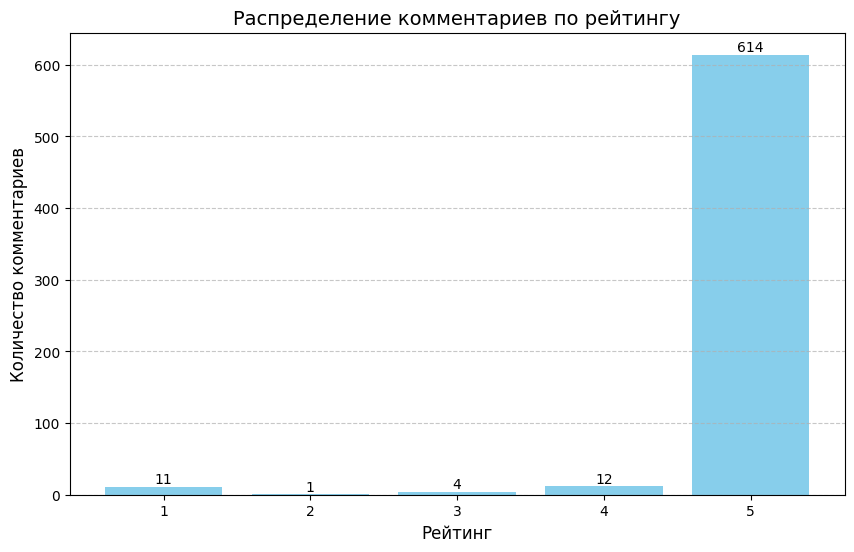

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('Razmetka_Koments.csv', encoding='utf-8')

# Группировка по рейтингу и подсчет количества комментариев
rating_counts = df['rating'].value_counts().sort_index()

# Создание графика
plt.figure(figsize=(10, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color='skyblue')

# Добавление подписей
plt.title('Распределение комментариев по рейтингу', fontsize=14)
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Количество комментариев', fontsize=12)
plt.xticks(rating_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавление значений над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.show()